# Fine tuning d'un modèle YOLO


S'occupe du fine tuning de YOLO11n.


## Installation des dépendances


In [1]:
%pip install matplotlib
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importation des dépendances


In [2]:
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

## Google colab


In [3]:
# from google.colab import drive

# drive.mount("/content/drive")

## Code principal


### Environnement


In [4]:
BASE_PATH = os.path.dirname(os.getcwd())
# BASE_PATH = "/content/drive/MyDrive/projet-ia-embarquee"

### Entrainement


In [ ]:
model = YOLO("yolo11n.pt")

model.overrides["project"] = f"{BASE_PATH}/yolo/runs"
results = model.train(model="yolo11n.pt", data=f"{BASE_PATH}/data/dataset1/data.yaml", epochs=100, patience=50, imgsz=640, save=True, save_period=5, device="cpu")

New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.50 🚀 Python-3.9.20 torch-2.5.1+cu124 CPU (Intel Core(TM) i5-8300H 2.30GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/jake/Projet_developpement_logiciel_application_IA_embarquee/data/dataset1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=cpu, workers=8, project=/home/jake/Projet_developpement_logiciel_application_IA_embarquee/yolo/runs, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, s

E0000 00:00:1734517265.826629   38196 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734517265.841613   38196 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /home/jake/Projet_developpement_logiciel_application_IA_embarquee/data/dataset1/images_labels/train/labels... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<00:00, 1152.36it/s]

train: New cache created: /home/jake/Projet_developpement_logiciel_application_IA_embarquee/data/dataset1/images_labels/train/labels.cache



val: Scanning /home/jake/Projet_developpement_logiciel_application_IA_embarquee/data/dataset1/images_labels/val/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1346.49it/s]

val: New cache created: /home/jake/Projet_developpement_logiciel_application_IA_embarquee/data/dataset1/images_labels/val/labels.cache


Plotting labels to /home/jake/Projet_developpement_logiciel_application_IA_embarquee/yolo/runs/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /home/jake/Projet_developpement_logiciel_application_IA_embarquee/yolo/runs/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/7 [00:00<?, ?it/s]

### Évaluation



image 1/1 c:\Users\Colin\Documents\M2\Projet_developpement_logiciel_application_IA_embarquee\data\dataset1\images_converted\test\30_001.png: 640x640 1 SpeedLimit30, 315.0ms
Speed: 1.0ms preprocess, 315.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Confidence: tensor([0.9537])


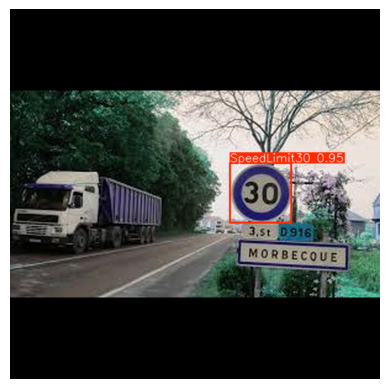


image 1/1 c:\Users\Colin\Documents\M2\Projet_developpement_logiciel_application_IA_embarquee\data\dataset1\images_converted\test\50_001.png: 640x640 1 SpeedLimit30, 1 SpeedLimit50, 292.0ms
Speed: 2.0ms preprocess, 292.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Confidence: tensor([0.8591, 0.3239])


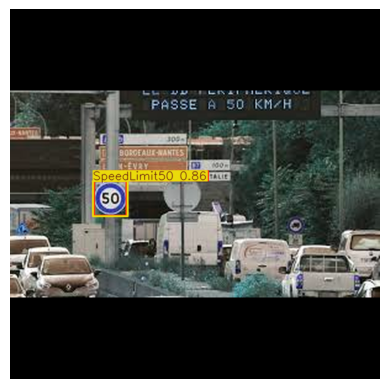

In [ ]:
model = YOLO(f"{BASE_PATH}/yolo/runs/train/weights/best.pt")

test_images_path = f"{BASE_PATH}/data/dataset1/images_converted/test/"

for image_name in os.listdir(test_images_path):
    image_path = os.path.join(test_images_path, image_name)

    results = model(image_path)
    results_image = results[0].plot()

    print(f"Confidence: {results[0].boxes.conf}")

    plt.imshow(results_image)
    plt.axis("off")
    plt.show()